##  Analyse des Résultats du semi marathon de paris

In [207]:
from pandas import * # pour manipuler des tableaux de données 
from numpy import *  # pour faire du calcul numérique
from matplotlib.pylab import * # pour tracer des graphiques
from datetime import datetime,timedelta
from matplotlib.ticker import MaxNLocator

####  Définition de functions utilitaires

In [208]:
 

def string_to_time(time_str):
    time_format = "%H:%M:%S"
    return datetime.strptime(time_str, time_format)

def get_seconds(datet,date_day):
    return (datet - date_day).total_seconds()

vectorized_string_to_datetime = np.vectorize(string_to_time)




In [209]:
df = read_excel('semi-de-paris.xlsx')

####  Statistiques diverse

In [210]:
print(f"vitesse moyenne {mean(df['average speed'])}")
print(f"mediane de la vitesse {median(df['average speed'])}")
print(f"age moyen {median(df['age'])}")
print(f"mediane de l'age {median(df['age'])}")
print(f"coreur le plus agé {max(df['age'])}")

vitesse moyenne 11.049480334728035
mediane de la vitesse 10.86
age moyen 31.0
mediane de l'age 31.0
coreur le plus agé 87


####  age en fonction des résultats au semi marathon de paris

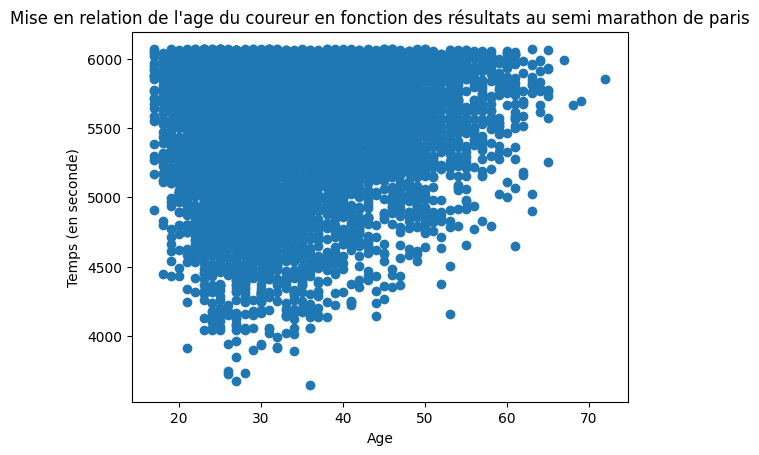

In [211]:
data = df.values
limit = 10000
time = vectorized_string_to_datetime(data[:limit,6])
timedelta = [get_seconds(t.replace(month=3, year=2024, day=3),datetime(2024, 3, 3)) for t in time]
ages = (data[:limit,3])
title('Mise en relation de l\'age du coureur en fonction des résultats au semi marathon de paris')
xlabel('Age')
ylabel('Temps (en seconde)')
scatter(ages,timedelta)



####  répartition du nombre de coureurs en fonction de leur age

Text(0, 0.5, 'Nombre de personnes')

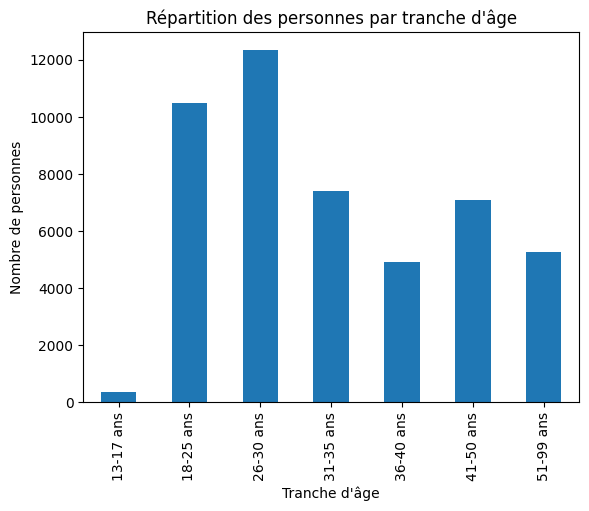

In [212]:
bins = [13,18, 25,30,35,40, 50, 87]

df['tranche_age'] = cut(df['age'], bins=bins, labels=['13-17 ans','18-25 ans', '26-30 ans', '31-35 ans', '36-40 ans', '41-50 ans', '51-99 ans'])
# Compter le nombre de personnes dans chaque tranche d'âge
nombre_personnes_par_tranche = df['tranche_age'].value_counts().sort_index()
# Création du graphique à barres
nombre_personnes_par_tranche.plot(kind='bar')

# Ajout de titres et d'étiquettes
plt.title('Répartition des personnes par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de personnes')

####  répartition de la vitesse moyenne en fonction des tranches d'age

C:\Users\chano\AppData\Local\Temp\ipykernel_8492\675899993.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyenne_notes_par_tranche = df.groupby('tranche_age')['average speed'].mean()


Text(0, 0.5, 'Moyenne des notes')

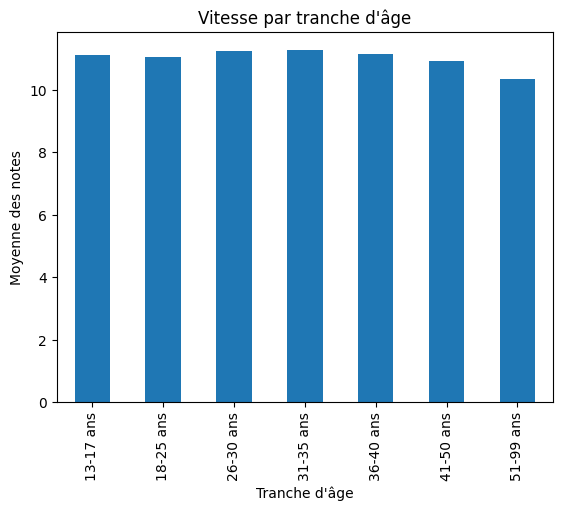

In [213]:
bins = [13,18, 25,30,35,40, 50, 87]

df['tranche_age'] = cut(df['age'], bins=bins, labels=['13-17 ans','18-25 ans', '26-30 ans', '31-35 ans', '36-40 ans', '41-50 ans', '51-99 ans'])
# Compter le nombre de personnes dans chaque tranche d'âge
moyenne_notes_par_tranche = df.groupby('tranche_age')['average speed'].mean()

# Création du graphique à barres
moyenne_notes_par_tranche.plot(kind='bar')

# Ajout de titres et d'étiquettes
plt.title('Vitesse par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Moyenne des notes')


####  Vitesse maximum par tranche d'age

C:\Users\chano\AppData\Local\Temp\ipykernel_8492\656334364.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyenne_notes_par_tranche = df.groupby('tranche_age')['average speed'].max()


Text(0, 0.5, 'Moyenne des notes')

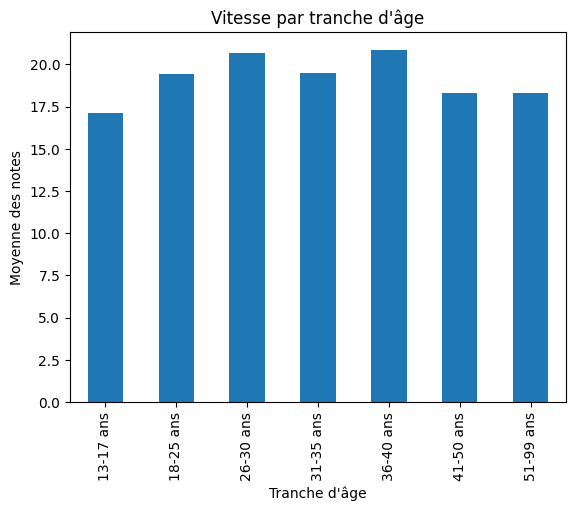

In [214]:
bins = [13,18, 25,30,35,40, 50, 87]

df['tranche_age'] = cut(df['age'], bins=bins, labels=['13-17 ans','18-25 ans', '26-30 ans', '31-35 ans', '36-40 ans', '41-50 ans', '51-99 ans'])
# Compter le nombre de personnes dans chaque tranche d'âge
moyenne_notes_par_tranche = df.groupby('tranche_age')['average speed'].max()

# Création du graphique à barres
moyenne_notes_par_tranche.plot(kind='bar')

# Ajout de titres et d'étiquettes
plt.title('Vitesse par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Moyenne des notes')


####  évolution de la vitesse moyenne en fonction des différentes étapes

Text(0.5, 0, 'distance (en km)')

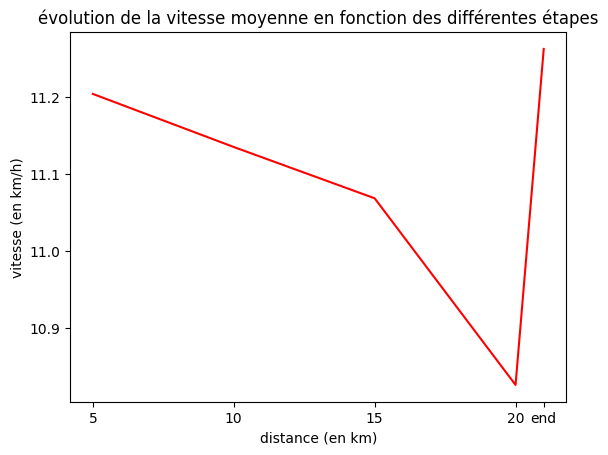

In [215]:
names = ["5 km speed","10 km speed","15 km speed","20 km speed","finish speed"]
labels = ["5","10","15","20","end"]
speeds = [mean(df[name]) for name in names]
steps = [0,1,2,3,3.2]

plot(steps,speeds, color='red', label='Sinus')

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks(steps)
ax.set_xticklabels( labels)

title('évolution de la vitesse moyenne en fonction des différentes étapes')
ylabel('vitesse (en km/h)')
xlabel('distance (en km)')

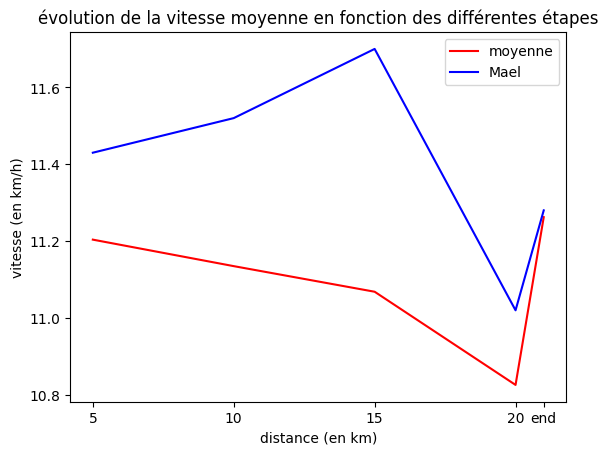

In [216]:
def compareSpeed(df,firstname,lastname,category ='Overall'):
    result = df.loc[(df['firstname'] == firstname) & (df['lastname'] == lastname)]
    filtered_df = df.loc[df[category].notna()]
    names = ["5 km speed","10 km speed","15 km speed","20 km speed","finish speed"]
    labels = ["5","10","15","20","end"]
    speeds = [mean(filtered_df[name]) for name in names]
    speedsUser = [mean(result[name]) for name in names]
    steps = [0,1,2,3,3.2]

    plot(steps,speeds, color='red', label= 'moyenne')
    plot(steps,speedsUser, color='blue', label=firstname)
    legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticks(steps)
    ax.set_xticklabels( labels)

    title('évolution de la vitesse moyenne en fonction des différentes étapes')
    ylabel('vitesse (en km/h)')
    xlabel('distance (en km)')

compareSpeed(df,'Mael','CHANON')